# Rhodium Basics

This file shows the basic concepts for rhodium programming (Robust Decision Making) 

"What is Rhodium?
Rhodium is an open source Python library providing methods for RDM and MORDM. It follows a declarative design, where you tell Rhodium the actions or analyses you wish to perform and it determines the necessary calculations. Rhodium can interface with models written in a variety of languages, including Python, C and Fortran, R, and Exce
"


One can begin by creating a model on python like this: .

In [2]:
from rhodium import * #of course first importing the designated packages, if you have trouble here you should install rhodium again using pip
import math 
import numpy as np 
import matplotlib.pyplot as plt
print("Console Output: Rhodium is now ready!")

Console Output: Rhodium is now ready!


first step to create a model is
-Defining the parameters of your system as a python function  

In [3]:
def any_problem(any_limit,b = -0.42,q = 2.0):          
    max = q*math.exp(b)*(q*b + b**2) 
    utility = q*math.pi     
    return (max, utility)

Then we optimize the problem!

In [4]:
model = Model(any_problem)

In [5]:
model.parameters = [Parameter("any_limit"),
                    Parameter("b"),
                    Parameter("q")]

In [6]:
model.responses = [Response("max",Response.MINIMIZE),
                  Response("utility",Response.MAXIMIZE)]

In [7]:
model.constraints = []

In [8]:
model.levers = [RealLever("any_limit", 0.0, 1.0, length = 100)]

In [9]:
model.uncertainties = [UniformUncertainty("b",-0.42,-0.005),
                      UniformUncertainty("q", -2.0, 3.0)]

**Actual Optimization:**

C:\Users\santosch\AppData\Local\anaconda3\Lib\site-packages\mplcursors\_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


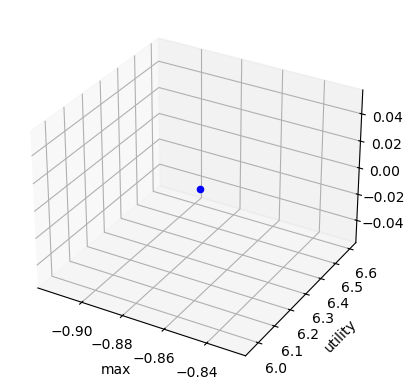

Found 1 optimal combinations!


In [10]:
output = optimize(model, "NSGAII", 1000)
scatter3d(model, output)
plt.show()
print("Found", len(output), "optimal combinations!")

# More linear examples: 

In [3]:
from rhodium import * #of course first importing the designated packages, if you have trouble here you should install rhodium again using pip
import math 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import root
print("Console Output: Rhodium is now ready!")

Console Output: Rhodium is now ready!


In [15]:

def otherproblem(a, b=0.1, c=2.0, mean = 0.02, stdev = 0.001,samples_montecarlo = 500):
    # Initialize arrays
    X = np.zeros((1000,))
    X = np.float64(X)
    average_P = np.zeros((1000,))
    for i in range(1,samples_montecarlo):
        X[0] = 0.0
        montecarlo =  np.random.lognormal(
            math.log(mean**2 / math.sqrt(stdev**2 + mean**2)),
            math.sqrt(math.log(1.0 + stdev**2 / mean**2)),
            size = 1000)
        for t in range(1, 1000):
            X[t] = (1.0-b*a)*X[t-1]**c+montecarlo 
            average_P += X[t]/float(samples_montecarlo)

    maxAverage = np.max(average_P)
    maxX = np.max(X)
    return maxX, maxAverage

In [16]:
model = Model(otherproblem)
model.parameters = [Parameter("a"),
                    Parameter("b"),
                    Parameter("c")]

model.responses = [Response("maxAverage", Response.MINIMIZE),
                   Response("maxX", Response.MINIMIZE)]

model.levers = [RealLever("a", 0.0, 5.0, length=1000)]

model.uncertainties = [UniformUncertainty("b", 1.0, 45.0),
                       UniformUncertainty("c", 2.0, 44.0)]

output = optimize(model, "NSGAII", 10000)
scatter3d(model, output)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

# Rhodium Example with a Differential Equation (Later)

In [84]:
import numpy as np
from rhodium import * #of course first importing the designated packages, if you have trouble here you should install rhodium again using pip
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

print("All packages loaded") 

All packages loaded


Now we have to define the cost function for the optization problem
- Cost Function is the differential equation and its possible solution
- There are all the variables implemented for rhodium

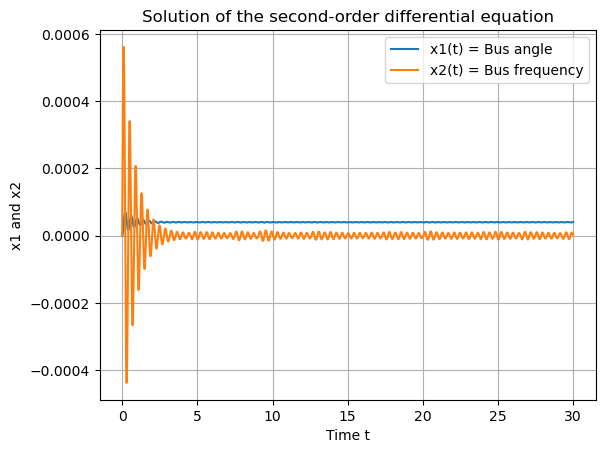

In [233]:
def system(t, x, d=1, m=0.4, b=100):
    x1, x2 = x
    dx1dt = x2
    dx2dt = -(d/m)*x2 - (b/m)*x1 + 1/100
    return (dx1dt, dx2dt)
    # Initial conditions
x0 = [0, 0]
    
# Time span
t_span = (0, 30)
t_eval = np.linspace(0, 30, 10000)
    
# Solve the system of ODEs
solution = solve_ivp(system, t_span, x0, t_eval=t_eval)

# Plot the results
plt.plot(solution.t, solution.y[0], label='x1(t) = Bus angle')
plt.plot(solution.t, solution.y[1], label="x2(t) = Bus frequency")
plt.xlabel('Time t')
plt.ylabel('x1 and x2')
plt.title('Solution of the second-order differential equation')
plt.legend()
plt.grid()
plt.show()

**Now defining the optimization model for Rhodium!**

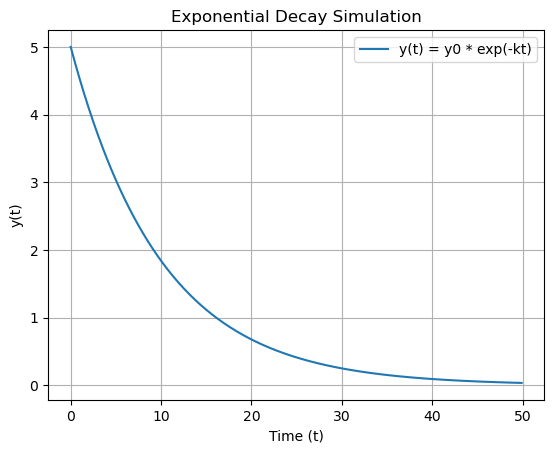

In [269]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mathematical equation
def exponential_decay(t, y0, k):
    return y0 * np.exp(-k * t)

# Define parameters
y0 = 5      # Initial value
k = 0.1     # Decay constant
t_end = 50  # End time
t_step = 0.1  # Time step

# Create an array of time values
t_values = np.arange(0, t_end, t_step)

# Evaluate the equation for each time value
y_values = exponential_decay(t_values, y0, k)

# Plot the results
plt.plot(t_values, y_values, label='y(t) = y0 * exp(-kt)')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Exponential Decay Simulation')
plt.legend()
plt.grid()
plt.show()
